# **Classificação do Dataset com K-means**

###  Notebook: `02-1_classificacao_kmeans`

## 1. Importação das bibliotecas essenciais

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## 2. Importação dos datasets


---

O dataset importado a seguir foi criado no notebook `01_tratamento_de_dados_classificacao-final` e será classificado com o 
algoritmo KMeans++, uma vez que, pelo tamanho do dataset, os algoritmos hierárquicos tiveram grandes dificuldades em ser 
executados (alta demanda de memória, uma vez que o dataset possui 20 colunas e 172882 linhas.

---


In [2]:
dataset_base_class = pd.read_csv('puc_tcc_dataset_classif_final.csv')

## 3. Teste de Classificação do dataset (K-Means)

In [3]:
dataset_base_class.head()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno
0,27018624,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1
1,12048428,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1
2,18107915,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1
3,27360348,0,0,0.0,0.00,30462.79,0.00,0.0,0.0,0.0,...,0.0,30462.79,0.0,0.0,0.0,0.0,0.0,0,0,1
4,15969714,0,0,0.0,15401.09,28152.53,28152.53,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1



---
O algoritmo kmeans++ classifica apenas dados numéricos e, neste caso, excluíremos o campo `nr_pessoa_juridica`, que será usado
apenas para identificar os contribuintes após a clusterização para a segunda coleta de dados que será realizada para gerar o 
dataset com as séries temporais, e os campos categóricos `status_diferenciada`, `status_especial`, `Porte_Grande`, `Porte_Médio`, e `Porte_Pequeno`.

---

In [4]:
dataset_cluster = dataset_base_class.iloc[:, [3,4,5,7,8,9,10,11,12,13,14,15,16,17]].values

In [5]:
type(dataset_cluster)

numpy.ndarray

In [6]:
pd.DataFrame(dataset_cluster).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,30462.79,0.0,0.0,0.0,0.0,0.0,30462.79,0.0,0.0,0.0,0.0,0.0
4,0.0,15401.09,28152.53,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


### 3.1 Normalização da escala


---
Conforme visto no notebook `01_tratamento_de_dados_classificacao-final`, o dataset possui diversos outliers e uma grande dispersão dos dados, entretanto, como os outliers são representativos do setor econômico e o acompanhamento de sua arrecadação é essencial para a atividade da RFB, serão mantidos. Junto a isso, alguns campos, como `pj_receita_bruta` possuem uma escala muito maior que outros campos, de modo que é possível que o primeiro distorça a classificação.

Diante disso, normalizarei o dataset antes da classificação.

---

In [7]:
from sklearn.preprocessing import Normalizer

dc_normalizer = Normalizer()

dataset_cluster_normalized = dc_normalizer.fit_transform(dataset_cluster)

print(dataset_cluster_normalized)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.98404100e-01 3.54713307e-02 4.39434202e-02 ... 0.00000000e+00
  0.00000000e+00 3.73412604e-06]
 [0.00000000e+00 0.00000000e+00 7.07106781e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.74896165e-01 1.67512501e-01 1.46565874e-01 ... 0.00000000e+00
  0.00000000e+00 6.55402058e-05]]


### 3.2 Verificando o número ótimo de clusters com o Método do Cotovelo (Elbow Method)

---

Para determinar o número ótimo de clusters a partir do dataset normalizado, vou usar o Método do Cotovelo, buscando o ponto onde há inflexão da curva, testando de 2 a 15 clusters.

Há a possibilidade da curva não ficar definida o suficente para identificar o número ótimo de clusters. Neste caso, usarei a análise de silhueta para identificar o número de clusters inicial para rodar o Kmeans++. 

---

In [8]:
from sklearn.cluster import KMeans
wcss = []
cluster_labels_list = []
cluster_centers_list = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=406)
    labels = kmeans.fit_predict(dataset_cluster_normalized)
    wcss.append(kmeans.inertia_)
    
    # Rótulos e centróides calculados para montagem do gráfico do método do cotovelo serão
    # reaproveitados na análise de silhueta
    
    cluster_labels_list.append(labels)
    cluster_centers_list.append(kmeans.cluster_centers_)
        

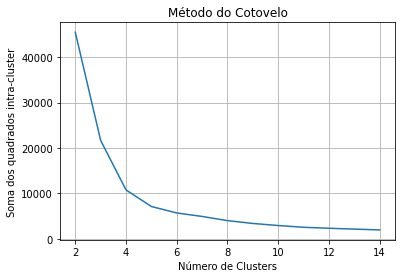

In [9]:
plt.plot(range(2, 15), wcss)
plt.grid()
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos quadrados intra-cluster')
plt.savefig('02-1_kmeans_metodo_cotovelo.png')
plt.show()

---

Considerando que o teste com o Método do Cotovelo não foi conclusivo, já que é possível que o número se situe entre `4` e `6` clusters, irei aplicar o método de Análise de Silhueta para tentar identificar o número ótimo de clusters.

---

### 3.3  Verificando o número ótimo de clusters com a análise de silhueta (Silhouette Analysis)

Para número de clusters = 2 , o silhouette_score médio é : 0.5403918570265925
Para número de clusters = 3 , o silhouette_score médio é : 0.7135416898933865
Para número de clusters = 4 , o silhouette_score médio é : 0.8013027116408243
Para número de clusters = 5 , o silhouette_score médio é : 0.8376357785987222
Para número de clusters = 6 , o silhouette_score médio é : 0.8504618332706189
Para número de clusters = 7 , o silhouette_score médio é : 0.8567911851216669
Para número de clusters = 8 , o silhouette_score médio é : 0.8647903959726108
Para número de clusters = 9 , o silhouette_score médio é : 0.8119027444417306
Para número de clusters = 10 , o silhouette_score médio é : 0.8140008107051745


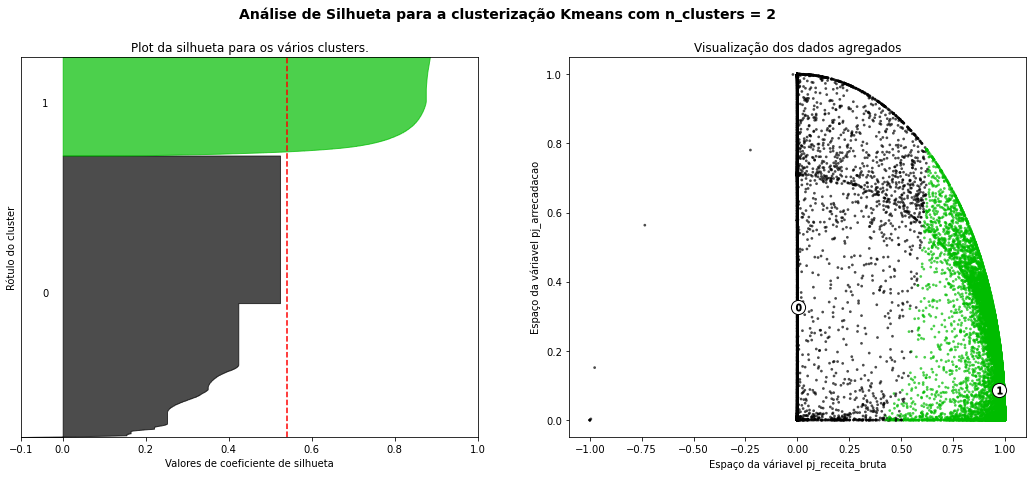

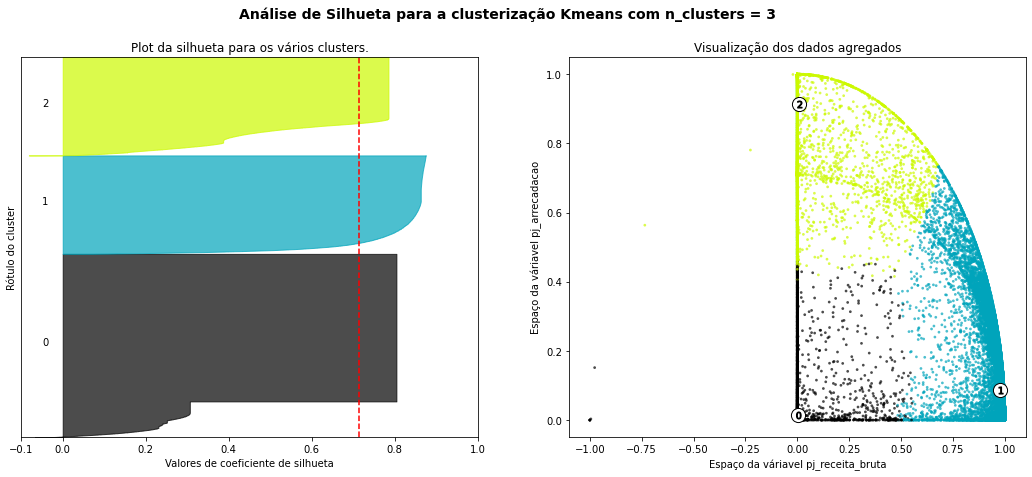

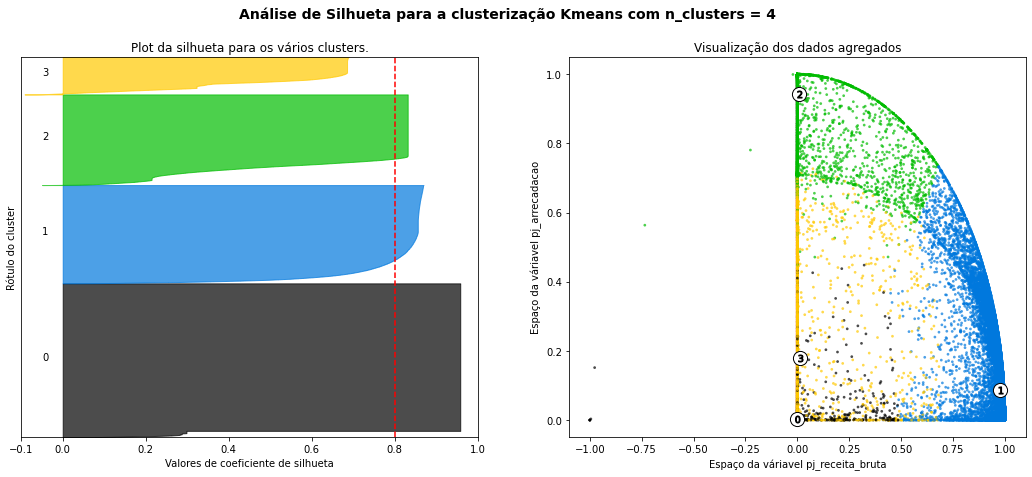

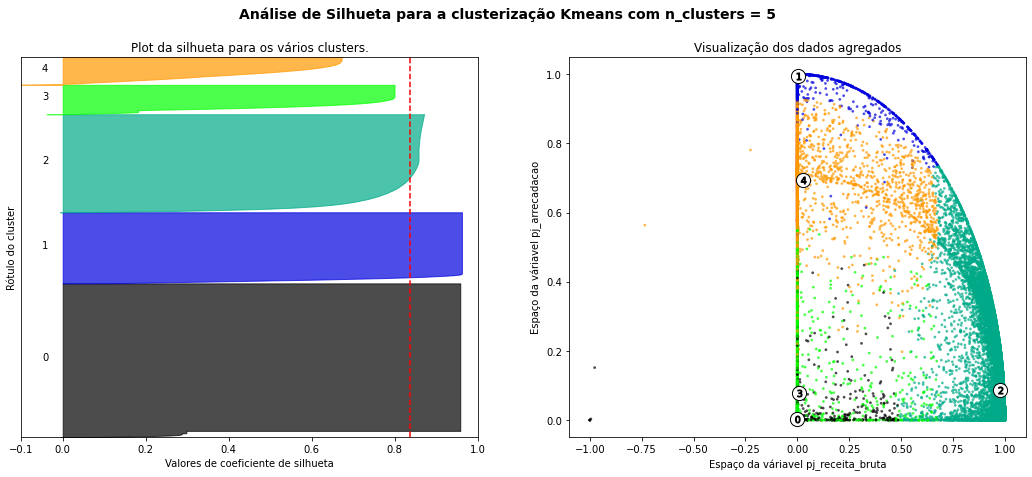

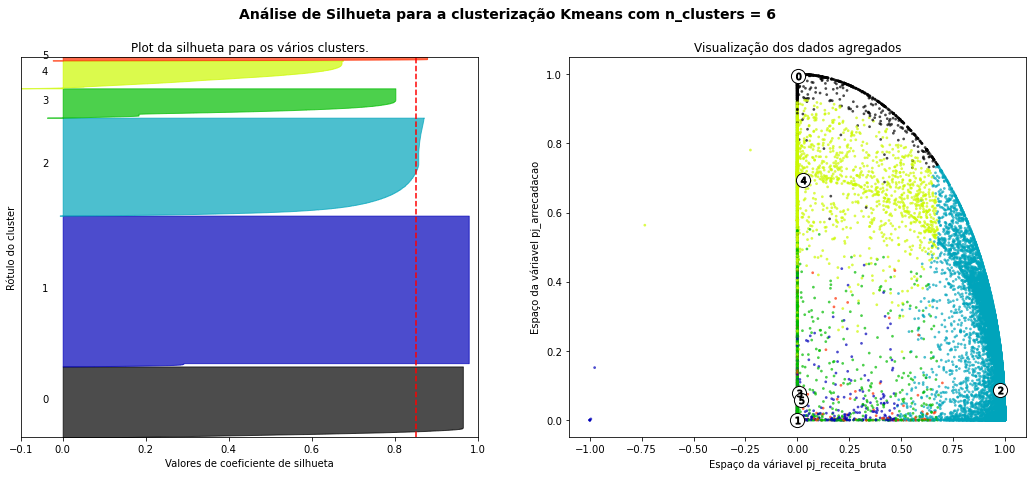

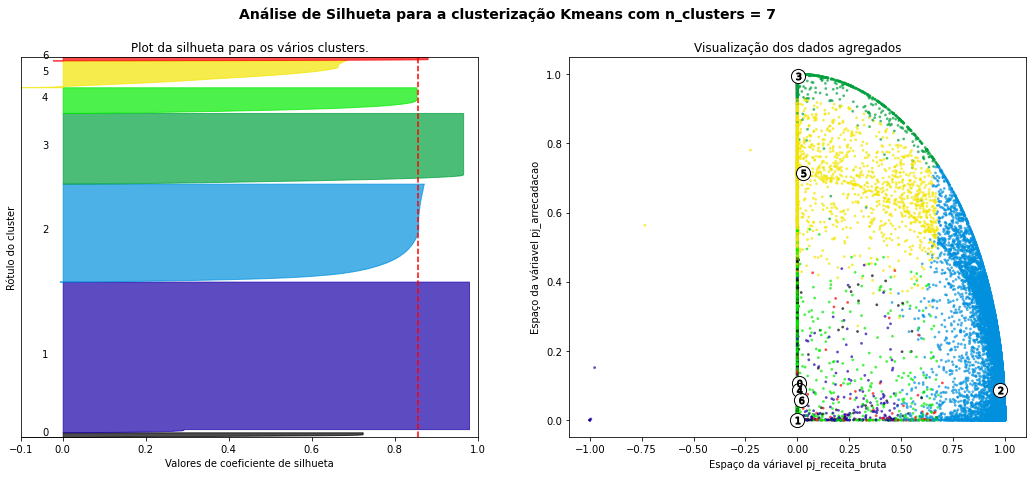

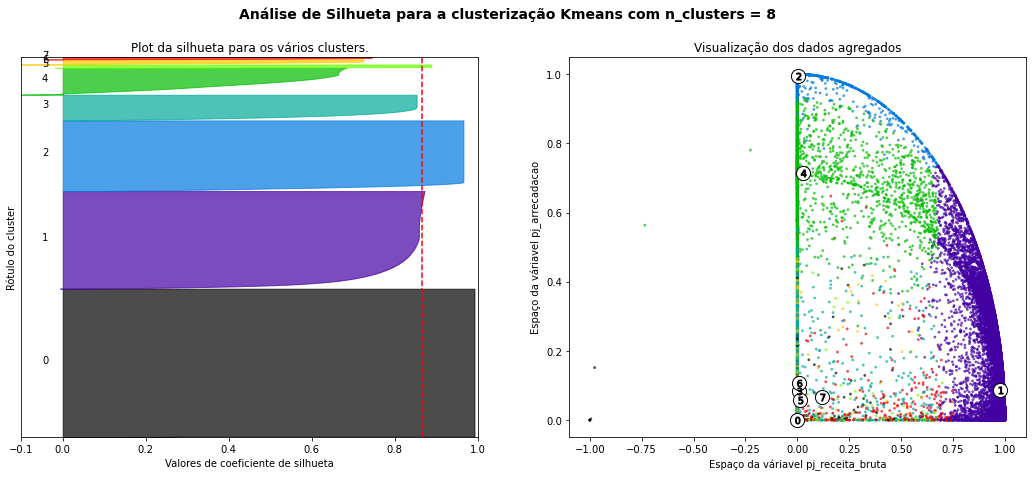

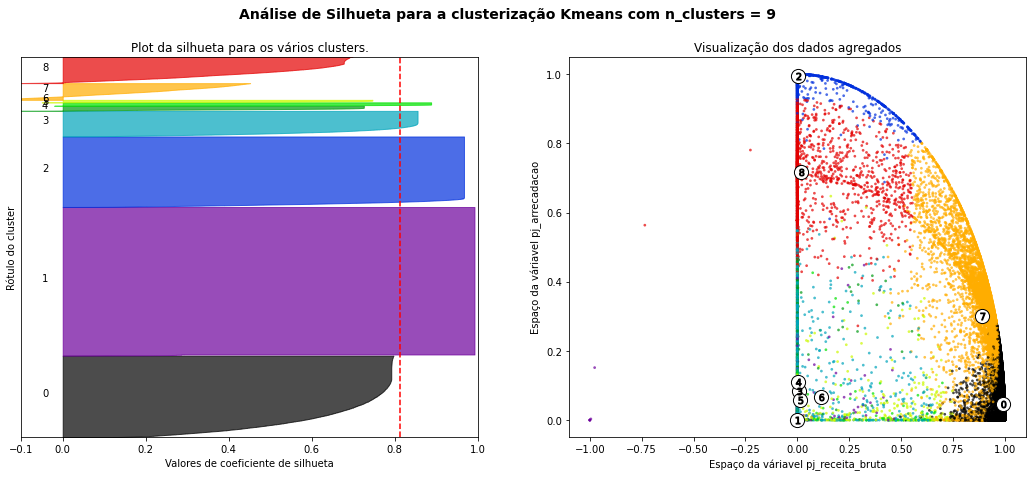

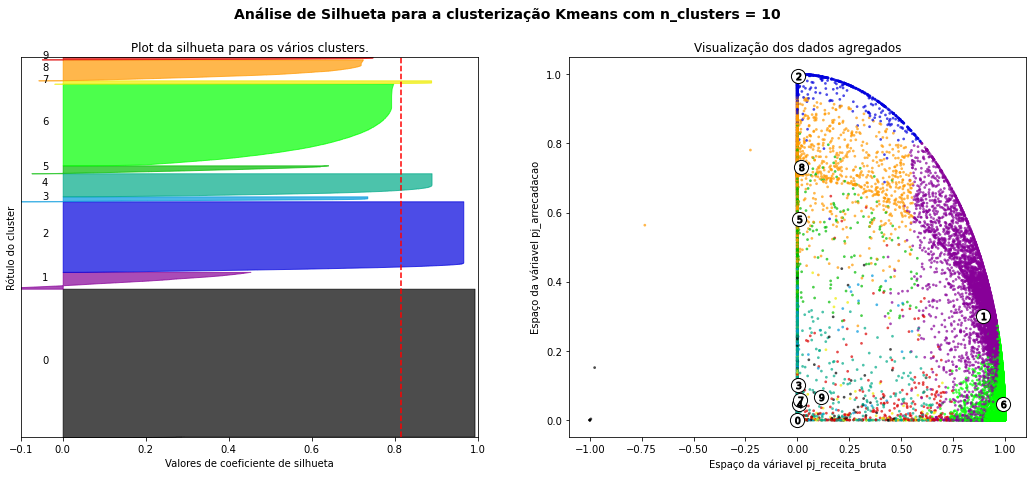

In [10]:

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    
    # Cria um subplot com 1 linha e 2 colunas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # O primeiro subplot é a silhueta para número de clusters n
    # Já testado anteriormente que os coeficientes de silhueta do exemplo situam-se entre 0 e 1,
    # então, independente da faixa do método situar-se entre -1 e 1, usarei a faixa entre -0,1 e 1
    ax1.set_xlim([-0.1, 1])
    
    
    # O valor (n_clusters+1)*10 é usado para separar os plots dos clusters  
    ax1.set_ylim([0, len(dataset_cluster_normalized) + (n_clusters + 1) * 10])

        
    # Reaproveitando os rótulos gerados no método do cotovelo
    cluster_labels = cluster_labels_list[n_clusters-2]
    
    # Calcula o escore de silhueta médio 
    silhouette_avg = silhouette_score(dataset_cluster_normalized, cluster_labels)
    print("Para número de clusters =", n_clusters,
          ", o silhouette_score médio é :", silhouette_avg)

    # Calcula o escore de silhueta para cada amostra
    sample_silhouette_values = silhouette_samples(dataset_cluster_normalized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        # Agrega os escores de silhueta para as amostras pertencentes ao
        # cluster i e os ordena
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Rotula a silhueta com o número do cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcula o novo valor de y_lower, considerando a silhueta já plotada
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Plot da silhueta para os vários clusters.")
    ax1.set_xlabel("Valores de coeficiente de silhueta")
    ax1.set_ylabel("Rótulo do cluster")

    # Linha vertical demarcando a média do escores para cada valor de clusters
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Segundo plot mostrando os clusters formados para pj_receita_bruta e pj_arrecadacao
    # indices 0 e 1 do dataset
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dataset_cluster_normalized[:, 0], dataset_cluster_normalized[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Rotulando os clusters 
    centers = cluster_centers_list[n_clusters-2]
    
    # Desenhando círculos em torno dos rótulos dos centróids
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualização dos dados agregados")
    ax2.set_xlabel("Espaço da váriavel pj_receita_bruta")
    ax2.set_ylabel("Espaço da váriavel pj_arrecadacao")

    plt.suptitle(("Análise de Silhueta para a clusterização Kmeans "
                  "com n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig(str('02-1_kmeans_analise_silhueta_com_'+str(n_clusters)+'_clusters.png'))

plt.show()

### 3.4 Treinando o modelo K-Means

---
Os resultados apresentados pelo método do cotovelo e pelo método da silhueta foram muito divergentes: entre `4`e `6` clusters  para o cotovelo e entre `6` e `8`, com maior escore de silhueta para `8` clusters. 

Metódo do cotovelo:

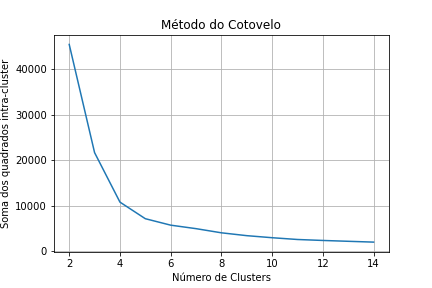


Analisando os plots gerados na análise de silhueta, vemos que para `8` clusters, há pouca separação entre os clusters 3, 4 e 5. Por sua vez, para `5` clusters, o plot mostra clusters mais distintos.

k=8 clusters:

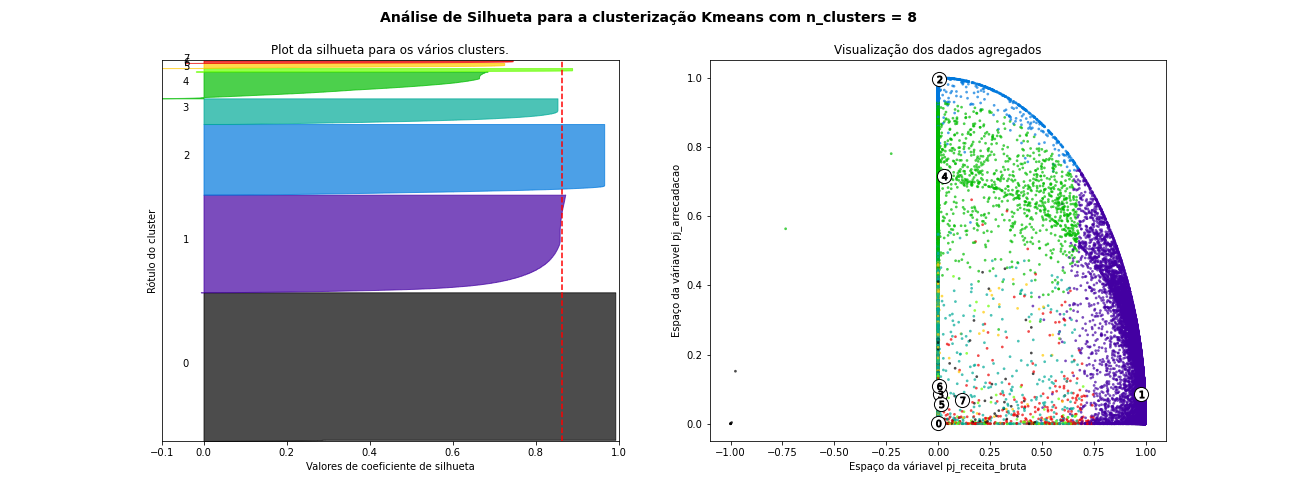



k=5 clusters:

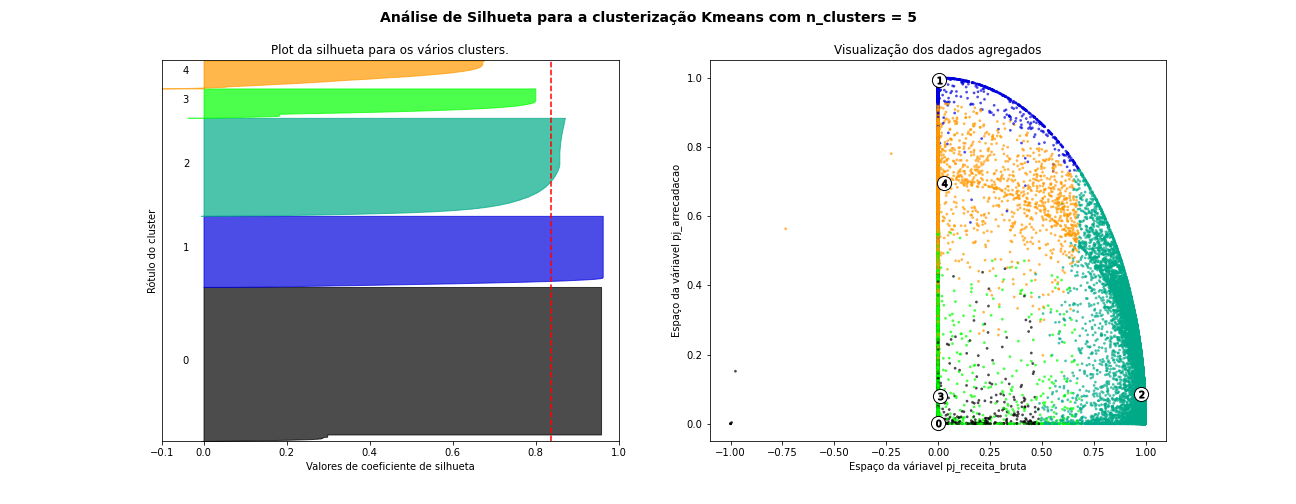

Diante desse resultados, farei as análises para `5, 6, 7 e 8` clusters.

---

In [11]:

kmeans5 = KMeans(n_clusters = 5, init = 'k-means++', random_state=406)
y_kmeans5 = kmeans5.fit_predict(dataset_cluster)

kmeans6 = KMeans(n_clusters = 6, init = 'k-means++', random_state=406)
y_kmeans6 = kmeans6.fit_predict(dataset_cluster)

kmeans7= KMeans(n_clusters = 7, init = 'k-means++', random_state=406)
y_kmeans7= kmeans7.fit_predict(dataset_cluster)

kmeans8 = KMeans(n_clusters = 8, init = 'k-means++', random_state=406)
y_kmeans8 = kmeans8.fit_predict(dataset_cluster)


### 3.3 Separando os agrupamentos para análise e identificação

#### 3.3.1 Análise `k=5` clusters

In [12]:
# Montando o dataset com os rótulos gerados pelo agrupamento

dataset_final_kmeans5 = dataset_base_class.copy()

dataset_final_kmeans5 = dataset_final_kmeans5.assign(cluster_contrib=pd.DataFrame(y_kmeans5).values)

In [13]:
dataset_final_kmeans5[dataset_final_kmeans5['cluster_contrib']==0].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.728100e+05,172810.000000,172810.000000,1.728100e+05,1.728100e+05,1.728100e+05,1.728100e+05,1.728100e+05,1.728100e+05,172810.0,...,1.728100e+05,1.728100e+05,1.728100e+05,1.728100e+05,1.728100e+05,1.728100e+05,172810.000000,172810.000000,172810.000000,172810.0
mean,1.503746e+07,0.010161,0.002222,7.941875e+06,9.673032e+05,6.317247e+05,4.475930e+05,1.000504e+05,1.062999e+03,0.0,...,4.141791e+04,6.740056e+04,1.206661e+05,7.096739e+05,1.944402e+04,2.278951e+05,0.010161,0.027116,0.962722,0.0
std,1.027123e+07,0.100291,0.047087,7.012808e+07,1.020515e+07,6.779141e+06,5.504832e+06,2.004939e+06,9.066540e+04,0.0,...,4.897070e+05,3.289272e+06,1.360074e+07,2.155723e+07,9.507604e+05,5.247897e+06,0.100291,0.162423,0.189443,0.0
min,1.050000e+02,0.000000,0.000000,-4.489938e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0
25%,6.487520e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
50%,1.434675e+07,0.000000,0.000000,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
75%,2.159132e+07,0.000000,0.000000,4.985987e+04,3.221844e+04,2.639610e+04,1.602043e+03,0.000000e+00,0.000000e+00,0.0,...,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
max,4.362966e+07,1.000000,1.000000,3.413149e+09,9.618635e+08,5.400176e+08,3.858709e+08,2.868970e+08,2.023640e+07,0.0,...,1.155033e+08,8.833967e+08,5.439023e+09,4.022649e+09,2.817398e+08,9.824786e+08,1.000000,1.000000,1.000000,0.0


In [14]:
dataset_final_kmeans5[dataset_final_kmeans5['cluster_contrib']==1].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.0,...,1.0,1.00,1.000000e+00,1.000000e+00,1.00,1.000000e+00,1.0,1.0,1.0,1.0
mean,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
25%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
50%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
75%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
max,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0


In [15]:
dataset_final_kmeans5[dataset_final_kmeans5['cluster_contrib']==2].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.000000e+01,10.0,10.0,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.0,...,10.0,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.0,10.0,10.0,10.0
mean,6.855315e+06,1.0,1.0,2.473200e+10,1.255484e+09,8.647807e+08,3.594665e+08,4.814585e+08,2.014609e+07,0.0,...,0.0,3.052404e+08,6.316686e+08,6.675670e+09,1.149034e+08,8.355770e+08,1.0,0.0,0.0,2.0
std,3.294657e+06,0.0,0.0,5.850185e+09,1.367056e+09,8.020708e+08,5.427081e+08,4.585570e+08,6.025340e+07,0.0,...,0.0,8.200378e+08,1.277851e+09,3.769788e+09,1.660968e+08,5.431219e+08,0.0,0.0,0.0,0.0
min,1.780520e+06,1.0,1.0,1.634697e+10,4.663914e+07,1.989482e+08,8.938996e+04,6.588079e+07,0.000000e+00,0.0,...,0.0,0.000000e+00,0.000000e+00,9.812519e+08,0.000000e+00,1.667628e+08,1.0,0.0,0.0,2.0
25%,3.968778e+06,1.0,1.0,1.987294e+10,4.561275e+08,2.341224e+08,1.654851e+06,2.107310e+08,0.000000e+00,0.0,...,0.0,7.473064e+06,1.070318e+07,5.013986e+09,1.484450e+06,4.609216e+08,1.0,0.0,0.0,2.0
50%,7.540238e+06,1.0,1.0,2.472618e+10,6.584361e+08,4.743797e+08,3.720311e+07,2.810603e+08,0.000000e+00,0.0,...,0.0,3.318771e+07,7.818140e+07,6.208876e+09,2.245032e+07,8.325258e+08,1.0,0.0,0.0,2.0
75%,9.361943e+06,1.0,1.0,3.000747e+10,2.101574e+09,1.560563e+09,5.796128e+08,6.519044e+08,4.406888e+05,0.0,...,0.0,1.019587e+08,2.807510e+08,9.349540e+09,1.711238e+08,9.880545e+08,1.0,0.0,0.0,2.0
max,1.152157e+07,1.0,1.0,3.236538e+10,4.047395e+09,2.320324e+09,1.503699e+09,1.633085e+09,1.914243e+08,0.0,...,0.0,2.635502e+09,3.991133e+09,1.312022e+10,4.715677e+08,2.008360e+09,1.0,0.0,0.0,2.0


In [16]:
dataset_final_kmeans5[dataset_final_kmeans5['cluster_contrib']==3].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,6.000000e+01,60.0,60.0,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.0,...,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.0,60.0,60.0,60.0
mean,8.527586e+06,1.0,1.0,6.721476e+09,8.993314e+08,5.928607e+08,4.416518e+08,1.185855e+08,4.965475e+06,0.0,...,20135.995667,1.708210e+08,3.093500e+08,1.276143e+09,1.043899e+07,1.940732e+08,1.0,0.0,0.0,3.0
std,4.323961e+06,0.0,0.0,3.244602e+09,9.982199e+08,8.278378e+08,7.681853e+08,1.726904e+08,2.027472e+07,0.0,...,114248.125461,5.952530e+08,6.376780e+08,1.925560e+09,2.004131e+07,2.340806e+08,0.0,0.0,0.0,0.0
min,2.549720e+05,1.0,1.0,3.248124e+09,3.489859e+07,3.473194e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000,0.000000e+00,0.000000e+00,1.353260e+07,0.000000e+00,0.000000e+00,1.0,0.0,0.0,3.0
25%,5.740636e+06,1.0,1.0,4.082641e+09,2.846113e+08,1.733459e+08,5.671940e+07,2.583993e+07,0.000000e+00,0.0,...,0.000000,0.000000e+00,1.259756e+07,1.815041e+08,0.000000e+00,3.500432e+07,1.0,0.0,0.0,3.0
50%,9.350017e+06,1.0,1.0,5.641722e+09,5.989380e+08,3.868706e+08,2.260932e+08,8.335123e+07,0.000000e+00,0.0,...,0.000000,1.139956e+05,5.052565e+07,4.582724e+08,1.237857e+06,1.328663e+08,1.0,0.0,0.0,3.0
75%,1.026274e+07,1.0,1.0,8.712951e+09,1.131841e+09,7.081624e+08,5.466586e+08,1.435253e+08,0.000000e+00,0.0,...,0.000000,3.713736e+07,1.348665e+08,1.732732e+09,9.146495e+06,2.801545e+08,1.0,0.0,0.0,3.0
max,1.889418e+07,1.0,1.0,1.508118e+10,6.215760e+09,5.857040e+09,5.399145e+09,1.207379e+09,1.019967e+08,0.0,...,821088.540000,4.135447e+09,2.730112e+09,9.534240e+09,1.091264e+08,1.065542e+09,1.0,0.0,0.0,3.0


In [17]:
dataset_final_kmeans5[dataset_final_kmeans5['cluster_contrib']==4].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.0,...,1.0,1.00,1.00,1.000000e+00,1.0,1.000000e+00,1.0,1.0,1.0,1.0
mean,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0
25%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0
50%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0
75%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0
max,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0


---
Os clusters gerados quando `k=5` mostraram-se muito concentrados no cluster `0` e com dois clusters (`1 e 3`) com apenas um contribuinte. O objetivo dessa classificação é agregar o máximo de contribuintes similares em grupos que possam ser selecionados a partir do comportamento real da arrecadação versus predição do melhor modelo, de modo que grupos muito concentrados ou com pouco contribuintes não são adequados à solução proposta.

___

#### 3.3.2 Análise `k=6` clusters

In [18]:
# Montando o dataset com os rótulos gerados pelo agrupamento


dataset_final_kmeans6 = dataset_base_class.copy()

dataset_final_kmeans6 = dataset_final_kmeans6.assign(cluster_contrib=pd.DataFrame(y_kmeans6).values)

In [19]:
dataset_final_kmeans6[dataset_final_kmeans6['cluster_contrib']==0].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.726930e+05,172693.000000,172693.000000,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,172693.0,...,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,172693.000000,172693.000000,172693.000000,172693.0
mean,1.504215e+07,0.009502,0.001581,6.597471e+06,8.357176e+05,5.440389e+05,3.846058e+05,7.846849e+04,9.018983e+02,0.0,...,4.133498e+04,5.415406e+04,5.695211e+04,4.870319e+05,1.461081e+04,1.730838e+05,0.009502,0.027135,0.963363,0.0
std,1.027252e+07,0.097016,0.039728,4.541411e+07,7.673018e+06,4.931941e+06,4.174154e+06,1.425693e+06,8.088024e+04,0.0,...,4.889405e+05,2.150434e+06,2.331841e+06,1.475949e+07,5.267032e+05,2.839579e+06,0.097016,0.162477,0.187870,0.0
min,1.050000e+02,0.000000,0.000000,-4.489938e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0
25%,6.488884e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
50%,1.435157e+07,0.000000,0.000000,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
75%,2.159617e+07,0.000000,0.000000,4.800000e+04,3.185369e+04,2.605641e+04,1.558160e+03,0.000000e+00,0.000000e+00,0.0,...,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
max,4.362966e+07,1.000000,1.000000,1.356671e+09,7.041231e+08,4.480996e+08,3.757182e+08,2.721184e+08,2.023640e+07,0.0,...,1.155033e+08,6.579131e+08,5.133140e+08,4.022649e+09,9.503023e+07,3.610000e+08,1.000000,1.000000,1.000000,0.0


In [20]:
dataset_final_kmeans6[dataset_final_kmeans6['cluster_contrib']==1].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.0,...,1.0,1.00,1.000000e+00,1.000000e+00,1.00,1.000000e+00,1.0,1.0,1.0,1.0
mean,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
25%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
50%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
75%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
max,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0


In [21]:
dataset_final_kmeans6[dataset_final_kmeans6['cluster_contrib']==2].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,9.000000e+00,9.0,9.0,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.0,...,9.0,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.0,9.0,9.0,9.0
mean,6.819358e+06,1.0,1.0,2.566367e+10,1.338259e+09,8.899977e+08,3.918521e+08,4.716393e+08,2.238455e+07,0.0,...,0.0,3.391557e+08,5.227599e+08,6.626472e+09,1.063185e+08,7.052678e+08,1.0,0.0,0.0,2.0
std,3.492430e+06,0.0,0.0,5.360750e+09,1.423154e+09,8.465095e+08,5.652869e+08,4.852568e+08,6.346583e+07,0.0,...,0.0,8.623106e+08,1.305212e+09,3.995057e+09,1.738032e+08,3.752648e+08,0.0,0.0,0.0,0.0
min,1.780520e+06,1.0,1.0,1.836394e+10,4.663914e+07,1.989482e+08,8.938996e+04,6.588079e+07,0.000000e+00,0.0,...,0.0,0.000000e+00,0.000000e+00,9.812519e+08,0.000000e+00,1.667628e+08,1.0,0.0,0.0,2.0
25%,3.367612e+06,1.0,1.0,2.196208e+10,4.379988e+08,2.255435e+08,1.355125e+06,2.058234e+08,0.000000e+00,0.0,...,0.0,2.841045e+07,6.195864e+06,4.916156e+09,1.121373e+06,4.127402e+08,1.0,0.0,0.0,2.0
50%,7.901550e+06,1.0,1.0,2.709768e+10,7.051972e+08,3.109312e+08,6.409732e+06,2.525446e+08,0.000000e+00,0.0,...,0.0,3.618735e+07,2.484292e+07,5.668782e+09,1.045252e+07,8.221187e+08,1.0,0.0,0.0,2.0
75%,9.365948e+06,1.0,1.0,3.088057e+10,2.539887e+09,1.767721e+09,6.866508e+08,6.792620e+08,5.875850e+05,0.0,...,0.0,1.050794e+08,2.258827e+08,1.009324e+10,1.079927e+08,8.871501e+08,1.0,0.0,0.0,2.0
max,1.152157e+07,1.0,1.0,3.236538e+10,4.047395e+09,2.320324e+09,1.503699e+09,1.633085e+09,1.914243e+08,0.0,...,0.0,2.635502e+09,3.991133e+09,1.312022e+10,4.715677e+08,1.323149e+09,1.0,0.0,0.0,2.0


In [22]:
dataset_final_kmeans6[dataset_final_kmeans6['cluster_contrib']==3].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.0,...,1.0,1.00,1.00,1.000000e+00,1.0,1.000000e+00,1.0,1.0,1.0,1.0
mean,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0
25%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0
50%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0
75%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0
max,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0


In [23]:
dataset_final_kmeans6[dataset_final_kmeans6['cluster_contrib']==4].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.550000e+02,155.000000,155.000000,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,155.0,...,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,155.000000,155.0,155.000000,155.0
mean,8.361065e+06,0.987097,0.961290,2.649198e+09,3.017565e+08,1.993432e+08,1.367760e+08,5.285273e+07,1.984471e+06,0.0,...,1.261415e+05,6.086293e+07,1.123059e+08,4.513711e+08,7.334127e+06,9.891297e+07,0.987097,0.0,0.012903,4.0
std,4.216958e+06,0.113223,0.193527,1.334489e+09,3.523784e+08,2.606086e+08,2.104982e+08,1.138308e+08,1.276116e+07,0.0,...,1.008522e+06,3.591396e+08,4.996274e+08,7.248287e+08,2.699579e+07,1.634099e+08,0.113223,0.0,0.113223,0.0
min,5.079500e+04,0.000000,0.000000,1.135815e+09,5.607370e+03,6.182700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.706287e+04,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,4.0
25%,5.879590e+06,1.000000,1.000000,1.654990e+09,8.091783e+07,5.244628e+07,1.207960e+07,7.480436e+06,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,4.671898e+04,5.493060e+07,0.000000e+00,1.095633e+07,1.000000,0.0,0.000000,4.0
50%,8.492639e+06,1.000000,1.000000,2.162388e+09,1.715203e+08,1.250095e+08,6.330817e+07,2.915757e+07,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,7.195366e+06,1.751293e+08,2.509938e+04,3.894861e+07,1.000000,0.0,0.000000,4.0
75%,9.577414e+06,1.000000,1.000000,3.324551e+09,4.280038e+08,2.696364e+08,1.929786e+08,5.105044e+07,0.000000e+00,0.0,...,0.000000e+00,4.642996e+06,5.114011e+07,5.184097e+08,4.361855e+06,1.168861e+08,1.000000,0.0,0.000000,4.0
max,2.536130e+07,1.000000,1.000000,6.764473e+09,2.008607e+09,1.926047e+09,1.823877e+09,1.207379e+09,1.019967e+08,0.0,...,1.055611e+07,4.135447e+09,5.439023e+09,4.074368e+09,2.817398e+08,1.060185e+09,1.000000,0.0,1.000000,4.0


In [24]:
dataset_final_kmeans6[dataset_final_kmeans6['cluster_contrib']==5].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,2.300000e+01,23.0,23.0,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,23.0,...,23.000000,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,23.0,23.0,23.0,23.0
mean,7.522455e+06,1.0,1.0,1.052645e+10,1.327619e+09,8.925175e+08,7.085499e+08,1.405015e+08,7.948150e+05,0.0,...,35814.575652,1.352597e+08,5.992393e+08,2.272011e+09,2.255013e+07,3.397147e+08,1.0,0.0,0.0,5.0
std,4.838748e+06,0.0,0.0,2.903736e+09,1.376331e+09,1.182225e+09,1.117849e+09,1.331099e+08,3.811799e+06,0.0,...,171184.529437,3.611422e+08,8.175301e+08,2.849747e+09,4.432887e+07,4.579464e+08,0.0,0.0,0.0,0.0
min,2.549720e+05,1.0,1.0,5.655381e+09,4.691879e+07,4.588560e+07,4.862180e+05,0.000000e+00,0.000000e+00,0.0,...,0.000000,0.000000e+00,1.102782e+06,3.577433e+07,0.000000e+00,0.000000e+00,1.0,0.0,0.0,5.0
25%,2.897636e+06,1.0,1.0,8.334745e+09,4.912295e+08,4.192711e+08,8.713048e+07,6.929997e+07,0.000000e+00,0.0,...,0.000000,0.000000e+00,4.333292e+07,2.521716e+08,6.903210e+03,9.897820e+07,1.0,0.0,0.0,5.0
50%,8.217513e+06,1.0,1.0,9.565430e+09,9.784740e+08,5.523221e+08,4.697249e+08,1.129928e+08,0.000000e+00,0.0,...,0.000000,1.719076e+04,1.177664e+08,1.143350e+09,4.464628e+06,1.678402e+08,1.0,0.0,0.0,5.0
75%,9.543562e+06,1.0,1.0,1.270435e+10,1.566726e+09,9.693801e+08,8.479594e+08,1.618764e+08,0.000000e+00,0.0,...,0.050000,4.991024e+07,9.674936e+08,2.852641e+09,2.411419e+07,4.440284e+08,1.0,0.0,0.0,5.0
max,1.635128e+07,1.0,1.0,1.634697e+10,6.215760e+09,5.857040e+09,5.399145e+09,5.698317e+08,1.828074e+07,0.0,...,821088.540000,1.297396e+09,2.730112e+09,9.534240e+09,1.921676e+08,2.008360e+09,1.0,0.0,0.0,5.0


___

Os clusters gerados quando `k=6` mostraram-se também muito concentrados no cluster `0` e com dois clusters (`1 e 3`) com apenas um contribuinte. O objetivo dessa classificação é agregar o máximo de contribuintes similares em grupos que possam ser selecionados a partir do comportamento real da arrecadação versus predição do melhor modelo, de modo que grupos muito concentrados ou com pouco contribuintes não são adequados à solução proposta.

___

#### 3.3.3 Análise de `k=7` clusters

In [25]:
# Montando o dataset com os rótulos gerados pelo agrupamento

dataset_final_kmeans7 = dataset_base_class.copy()

dataset_final_kmeans7 = dataset_final_kmeans7.assign(cluster_contrib=pd.DataFrame(y_kmeans7).values)

In [26]:
dataset_final_kmeans7.head(100)

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
0,27018624,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,12048428,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,18107915,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1,0
3,27360348,0,0,0.0,0.00,30462.79,0.00,0.0,0.0,0.0,...,30462.79,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,15969714,0,0,0.0,15401.09,28152.53,28152.53,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16347369,0,0,0.0,9172.08,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1,0
96,10334759,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1,0
97,19668939,0,0,0.0,767.50,65.62,0.00,0.0,0.0,0.0,...,65.62,0.0,0.0,0.0,0.0,0.0,0,0,1,0
98,1705384,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1,0


In [27]:
dataset_final_kmeans7[dataset_final_kmeans7['cluster_contrib']==0].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.724120e+05,172412.000000,172412.000000,1.724120e+05,1.724120e+05,1.724120e+05,1.724120e+05,1.724120e+05,1.724120e+05,172412.0,...,1.724120e+05,1.724120e+05,1.724120e+05,1.724120e+05,1.724120e+05,1.724120e+05,172412.000000,172412.000000,172412.000000,172412.0
mean,1.505238e+07,0.007958,0.000545,5.224834e+06,6.784153e+05,4.479988e+05,3.115567e+05,5.834497e+04,7.612272e+02,0.0,...,4.084205e+04,4.708295e+04,3.895067e+04,3.624307e+05,1.205203e+04,1.317291e+05,0.007958,0.027138,0.964904,0.0
std,1.027570e+07,0.088850,0.023343,2.888618e+07,5.393542e+06,3.477030e+06,2.932429e+06,1.037416e+06,6.395188e+04,0.0,...,4.791141e+05,2.018204e+06,1.791339e+06,1.308315e+07,4.553269e+05,2.182393e+06,0.088850,0.162487,0.184023,0.0
min,1.050000e+02,0.000000,0.000000,-4.489938e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0
25%,6.491994e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
50%,1.436286e+07,0.000000,0.000000,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
75%,2.161048e+07,0.000000,0.000000,4.299975e+04,3.111330e+04,2.519589e+04,1.458845e+03,0.000000e+00,0.000000e+00,0.0,...,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
max,4.362966e+07,1.000000,1.000000,5.744087e+08,5.450265e+08,3.334001e+08,3.334001e+08,2.721184e+08,1.538119e+07,0.0,...,1.155033e+08,6.579131e+08,5.133140e+08,4.022649e+09,9.503023e+07,3.610000e+08,1.000000,1.000000,1.000000,0.0


In [28]:
dataset_final_kmeans7[dataset_final_kmeans7['cluster_contrib']==1].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.0,...,1.0,1.00,1.000000e+00,1.000000e+00,1.00,1.000000e+00,1.0,1.0,1.0,1.0
mean,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
25%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
50%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
75%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
max,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0


In [29]:
dataset_final_kmeans7[dataset_final_kmeans7['cluster_contrib']==2].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,2.000000e+01,20.0,20.0,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.0,...,20.00000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.0,20.0,20.0,20.0
mean,7.067537e+06,1.0,1.0,1.159844e+10,1.399919e+09,9.770198e+08,7.443684e+08,1.842642e+08,9.140372e+05,0.0,...,5.09550,1.535921e+08,6.308897e+08,2.373830e+09,2.586301e+07,4.144643e+08,1.0,0.0,0.0,2.0
std,5.031673e+06,0.0,0.0,3.032816e+09,1.462854e+09,1.252070e+09,1.194167e+09,1.788108e+08,4.087699e+06,0.0,...,22.57392,3.848403e+08,8.452438e+08,2.588122e+09,4.676146e+07,4.863957e+08,0.0,0.0,0.0,0.0
min,2.549720e+05,1.0,1.0,7.222563e+09,4.691879e+07,4.588560e+07,4.862180e+05,6.676558e+06,0.000000e+00,0.0,...,0.00000,0.000000e+00,1.102782e+06,7.991030e+07,0.000000e+00,4.073560e+06,1.0,0.0,0.0,2.0
25%,1.580420e+06,1.0,1.0,9.347412e+09,4.647828e+08,4.369303e+08,8.395849e+07,1.061986e+08,0.000000e+00,0.0,...,0.00000,0.000000e+00,4.375048e+07,2.852266e+08,6.516051e+05,1.411564e+08,1.0,0.0,0.0,2.0
50%,7.599720e+06,1.0,1.0,1.096224e+10,1.013490e+09,6.706947e+08,4.248112e+08,1.337933e+08,0.000000e+00,0.0,...,0.00000,6.370850e+05,2.098476e+08,1.733841e+09,7.649649e+06,1.979845e+08,1.0,0.0,0.0,2.0
75%,9.381476e+06,1.0,1.0,1.335020e+10,1.620871e+09,1.034165e+09,8.608039e+08,1.765191e+08,0.000000e+00,0.0,...,0.00000,5.574089e+07,8.971520e+08,3.229175e+09,2.617779e+07,6.173373e+08,1.0,0.0,0.0,2.0
max,1.635128e+07,1.0,1.0,1.836394e+10,6.215760e+09,5.857040e+09,5.399145e+09,6.805889e+08,1.828074e+07,0.0,...,101.00000,1.297396e+09,2.730112e+09,9.534240e+09,1.921676e+08,2.008360e+09,1.0,0.0,0.0,2.0


In [30]:
dataset_final_kmeans7[dataset_final_kmeans7['cluster_contrib']==3].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,8.000000e+00,8.0,8.0,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.0,...,8.0,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.0,8.0,8.0,8.0
mean,6.950243e+06,1.0,1.0,2.657614e+10,1.417392e+09,8.838614e+08,4.085212e+08,4.455206e+08,2.518262e+07,0.0,...,0.0,3.770267e+08,5.507248e+08,6.840261e+09,1.194682e+08,6.880597e+08,1.0,0.0,0.0,3.0
std,3.709892e+06,0.0,0.0,4.927391e+09,1.500098e+09,9.047428e+08,6.019478e+08,5.119537e+08,6.725176e+07,0.0,...,0.0,9.138125e+08,1.392445e+09,4.215499e+09,1.809541e+08,3.973607e+08,0.0,0.0,0.0,0.0
min,1.780520e+06,1.0,1.0,1.917656e+10,4.663914e+07,1.989482e+08,8.938996e+04,6.588079e+07,0.000000e+00,0.0,...,0.0,0.000000e+00,0.000000e+00,9.812519e+08,0.000000e+00,1.667628e+08,1.0,0.0,0.0,3.0
25%,3.233486e+06,1.0,1.0,2.225654e+10,3.475645e+08,2.206734e+08,1.076302e+06,2.025021e+08,0.000000e+00,0.0,...,0.0,2.143132e+07,5.146541e+06,4.521257e+09,1.930262e+06,3.759055e+08,1.0,0.0,0.0,3.0
50%,8.625738e+06,1.0,1.0,2.724292e+10,6.991547e+08,2.853952e+08,4.481879e+06,2.389993e+08,0.000000e+00,0.0,...,0.0,6.139243e+07,2.453403e+07,6.208876e+09,2.245032e+07,7.137922e+08,1.0,0.0,0.0,3.0
75%,9.395388e+06,1.0,1.0,3.100642e+10,2.603076e+09,1.771166e+09,7.817811e+08,4.019976e+08,2.802940e+06,0.0,...,0.0,1.097954e+08,1.551106e+08,1.022982e+10,1.631721e+08,9.207849e+08,1.0,0.0,0.0,3.0
max,1.152157e+07,1.0,1.0,3.236538e+10,4.047395e+09,2.320324e+09,1.503699e+09,1.633085e+09,1.914243e+08,0.0,...,0.0,2.635502e+09,3.991133e+09,1.312022e+10,4.715677e+08,1.323149e+09,1.0,0.0,0.0,3.0


In [31]:
dataset_final_kmeans7[dataset_final_kmeans7['cluster_contrib']==4].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.0,...,1.0,1.00,1.00,1.000000e+00,1.0,1.000000e+00,1.0,1.0,1.0,1.0
mean,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0
25%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0
50%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0
75%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0
max,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,4.0


In [32]:
dataset_final_kmeans7[dataset_final_kmeans7['cluster_contrib']==5].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,5.200000e+01,52.0,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.0,...,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.0,52.0,52.0,52.0
mean,8.580419e+06,1.0,0.980769,4.567975e+09,5.725231e+08,3.762061e+08,2.540398e+08,1.015965e+08,5.413498e+06,0.0,...,23308.651731,1.394453e+08,1.893543e+08,8.814622e+08,5.886288e+06,1.585290e+08,1.0,0.0,0.0,5.0
std,3.935675e+06,0.0,0.138675,1.294785e+09,4.897591e+08,3.761774e+08,3.236541e+08,1.812264e+08,2.163761e+07,0.0,...,122570.313094,6.000134e+08,4.359709e+08,1.502096e+09,1.431301e+07,2.182530e+08,0.0,0.0,0.0,0.0
min,5.681000e+04,1.0,0.000000,2.927289e+09,1.296813e+07,1.154697e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000,0.000000e+00,0.000000e+00,1.353260e+07,0.000000e+00,0.000000e+00,1.0,0.0,0.0,5.0
25%,6.192488e+06,1.0,1.000000,3.573660e+09,1.635224e+08,1.476654e+08,3.457992e+07,1.362887e+07,0.000000e+00,0.0,...,0.000000,0.000000e+00,2.812018e+06,1.804107e+08,0.000000e+00,2.238889e+07,1.0,0.0,0.0,5.0
50%,9.434533e+06,1.0,1.000000,4.099696e+09,4.747213e+08,2.774689e+08,1.588500e+08,5.484124e+07,0.000000e+00,0.0,...,0.000000,3.559171e+04,5.144549e+07,3.713093e+08,6.070740e+04,8.810991e+07,1.0,0.0,0.0,5.0
75%,1.026274e+07,1.0,1.000000,5.589297e+09,7.738635e+08,4.779169e+08,3.628119e+08,1.158142e+08,0.000000e+00,0.0,...,0.000000,9.874450e+06,1.327002e+08,8.949536e+08,2.816822e+06,1.829486e+08,1.0,0.0,0.0,5.0
max,1.889418e+07,1.0,1.000000,7.759186e+09,2.008607e+09,1.926047e+09,1.823877e+09,1.207379e+09,1.019967e+08,0.0,...,821088.540000,4.135447e+09,2.634603e+09,9.019000e+09,6.622303e+07,1.060185e+09,1.0,0.0,0.0,5.0


In [33]:
dataset_final_kmeans7[dataset_final_kmeans7['cluster_contrib']==6].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,3.880000e+02,388.000000,388.000000,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,388.0,...,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,388.000000,388.000000,388.000000,388.0
mean,8.634819e+06,0.963918,0.724227,1.134297e+09,1.226772e+08,7.725107e+07,5.763044e+07,1.708139e+07,1.304071e+05,0.0,...,2.983665e+05,9.000726e+06,3.130004e+07,1.428915e+08,3.295070e+06,3.771591e+07,0.963918,0.018041,0.018041,6.0
std,4.900401e+06,0.186736,0.447480,5.414743e+08,1.262517e+08,8.706702e+07,7.539637e+07,2.736978e+07,1.350139e+06,0.0,...,2.179974e+06,5.417983e+07,2.801024e+08,3.166606e+08,1.733428e+07,7.120277e+07,0.186736,0.133272,0.133272,0.0
min,1.196600e+04,0.000000,0.000000,5.492120e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,6.0
25%,5.561007e+06,1.000000,0.000000,6.968414e+08,3.471306e+07,2.190818e+07,5.739188e+06,1.623506e+06,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.351483e+07,0.000000e+00,3.288070e+06,1.000000,0.000000,0.000000,6.0
50%,8.658328e+06,1.000000,1.000000,9.620406e+08,8.669237e+07,5.059377e+07,3.018970e+07,8.165138e+06,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,1.608571e+05,3.624520e+07,0.000000e+00,1.427829e+07,1.000000,0.000000,0.000000,6.0
75%,1.095859e+07,1.000000,1.000000,1.415098e+09,1.655409e+08,1.050749e+08,8.214384e+07,2.235186e+07,0.000000e+00,0.0,...,0.000000e+00,1.961712e+05,6.622999e+06,1.177889e+08,1.247888e+06,4.616453e+07,1.000000,0.000000,0.000000,6.0
max,2.536130e+07,1.000000,1.000000,2.983582e+09,9.618635e+08,5.400176e+08,3.858709e+08,2.674380e+08,2.023640e+07,0.0,...,2.896813e+07,8.833967e+08,5.439023e+09,2.834970e+09,2.817398e+08,8.701231e+08,1.000000,1.000000,1.000000,6.0


___

Os clusters gerados quando `k=7` mostraram-se também muito concentrados no cluster `0` e com dois clusters (`1 e 4`) com apenas um contribuinte. O objetivo dessa classificação é agregar o máximo de contribuintes similares em grupos que possam ser selecionados a partir do comportamento real da arrecadação versus predição do melhor modelo, de modo que grupos muito concentrados ou com pouco contribuintes não são adequados à solução proposta.

___

#### 3.3.4 Análise de k=8 clusters

In [34]:
# Montando o dataset com os rótulos gerados pelo agrupamento

dataset_final_kmeans8 = dataset_base_class.copy()

dataset_final_kmeans8 = dataset_final_kmeans8.assign(cluster_contrib=pd.DataFrame(y_kmeans6).values)

In [35]:
dataset_final_kmeans8[dataset_final_kmeans8['cluster_contrib']==0].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.726930e+05,172693.000000,172693.000000,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,172693.0,...,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,1.726930e+05,172693.000000,172693.000000,172693.000000,172693.0
mean,1.504215e+07,0.009502,0.001581,6.597471e+06,8.357176e+05,5.440389e+05,3.846058e+05,7.846849e+04,9.018983e+02,0.0,...,4.133498e+04,5.415406e+04,5.695211e+04,4.870319e+05,1.461081e+04,1.730838e+05,0.009502,0.027135,0.963363,0.0
std,1.027252e+07,0.097016,0.039728,4.541411e+07,7.673018e+06,4.931941e+06,4.174154e+06,1.425693e+06,8.088024e+04,0.0,...,4.889405e+05,2.150434e+06,2.331841e+06,1.475949e+07,5.267032e+05,2.839579e+06,0.097016,0.162477,0.187870,0.0
min,1.050000e+02,0.000000,0.000000,-4.489938e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0
25%,6.488884e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
50%,1.435157e+07,0.000000,0.000000,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
75%,2.159617e+07,0.000000,0.000000,4.800000e+04,3.185369e+04,2.605641e+04,1.558160e+03,0.000000e+00,0.000000e+00,0.0,...,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.0
max,4.362966e+07,1.000000,1.000000,1.356671e+09,7.041231e+08,4.480996e+08,3.757182e+08,2.721184e+08,2.023640e+07,0.0,...,1.155033e+08,6.579131e+08,5.133140e+08,4.022649e+09,9.503023e+07,3.610000e+08,1.000000,1.000000,1.000000,0.0


In [36]:
dataset_final_kmeans8[dataset_final_kmeans8['cluster_contrib']==1].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.0,...,1.0,1.00,1.000000e+00,1.000000e+00,1.00,1.000000e+00,1.0,1.0,1.0,1.0
mean,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
25%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
50%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
75%,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0
max,7175508.0,1.0,1.0,2.991427e+11,1.094862e+11,5.093169e+10,5.071394e+10,72920381.0,0.0,143926915.6,...,900000.0,13866292.93,2.918002e+09,8.392043e+10,57123381.29,1.215380e+09,1.0,0.0,0.0,1.0


In [37]:
dataset_final_kmeans8[dataset_final_kmeans8['cluster_contrib']==2].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,9.000000e+00,9.0,9.0,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.0,...,9.0,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.0,9.0,9.0,9.0
mean,6.819358e+06,1.0,1.0,2.566367e+10,1.338259e+09,8.899977e+08,3.918521e+08,4.716393e+08,2.238455e+07,0.0,...,0.0,3.391557e+08,5.227599e+08,6.626472e+09,1.063185e+08,7.052678e+08,1.0,0.0,0.0,2.0
std,3.492430e+06,0.0,0.0,5.360750e+09,1.423154e+09,8.465095e+08,5.652869e+08,4.852568e+08,6.346583e+07,0.0,...,0.0,8.623106e+08,1.305212e+09,3.995057e+09,1.738032e+08,3.752648e+08,0.0,0.0,0.0,0.0
min,1.780520e+06,1.0,1.0,1.836394e+10,4.663914e+07,1.989482e+08,8.938996e+04,6.588079e+07,0.000000e+00,0.0,...,0.0,0.000000e+00,0.000000e+00,9.812519e+08,0.000000e+00,1.667628e+08,1.0,0.0,0.0,2.0
25%,3.367612e+06,1.0,1.0,2.196208e+10,4.379988e+08,2.255435e+08,1.355125e+06,2.058234e+08,0.000000e+00,0.0,...,0.0,2.841045e+07,6.195864e+06,4.916156e+09,1.121373e+06,4.127402e+08,1.0,0.0,0.0,2.0
50%,7.901550e+06,1.0,1.0,2.709768e+10,7.051972e+08,3.109312e+08,6.409732e+06,2.525446e+08,0.000000e+00,0.0,...,0.0,3.618735e+07,2.484292e+07,5.668782e+09,1.045252e+07,8.221187e+08,1.0,0.0,0.0,2.0
75%,9.365948e+06,1.0,1.0,3.088057e+10,2.539887e+09,1.767721e+09,6.866508e+08,6.792620e+08,5.875850e+05,0.0,...,0.0,1.050794e+08,2.258827e+08,1.009324e+10,1.079927e+08,8.871501e+08,1.0,0.0,0.0,2.0
max,1.152157e+07,1.0,1.0,3.236538e+10,4.047395e+09,2.320324e+09,1.503699e+09,1.633085e+09,1.914243e+08,0.0,...,0.0,2.635502e+09,3.991133e+09,1.312022e+10,4.715677e+08,1.323149e+09,1.0,0.0,0.0,2.0


In [38]:
dataset_final_kmeans8[dataset_final_kmeans8['cluster_contrib']==3].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.0,...,1.0,1.00,1.00,1.000000e+00,1.0,1.000000e+00,1.0,1.0,1.0,1.0
mean,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0
25%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0
50%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0
75%,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0
max,16200282.0,1.0,1.0,0.0,4.947283e+09,4.939043e+09,4.198311e+09,442190544.0,0.0,0.0,...,0.0,65191640.17,16323321.23,4.309611e+10,0.0,2.709710e+08,1.0,0.0,0.0,3.0


In [39]:
dataset_final_kmeans8[dataset_final_kmeans8['cluster_contrib']==4].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,1.550000e+02,155.000000,155.000000,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,155.0,...,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,155.000000,155.0,155.000000,155.0
mean,8.361065e+06,0.987097,0.961290,2.649198e+09,3.017565e+08,1.993432e+08,1.367760e+08,5.285273e+07,1.984471e+06,0.0,...,1.261415e+05,6.086293e+07,1.123059e+08,4.513711e+08,7.334127e+06,9.891297e+07,0.987097,0.0,0.012903,4.0
std,4.216958e+06,0.113223,0.193527,1.334489e+09,3.523784e+08,2.606086e+08,2.104982e+08,1.138308e+08,1.276116e+07,0.0,...,1.008522e+06,3.591396e+08,4.996274e+08,7.248287e+08,2.699579e+07,1.634099e+08,0.113223,0.0,0.113223,0.0
min,5.079500e+04,0.000000,0.000000,1.135815e+09,5.607370e+03,6.182700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.706287e+04,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,4.0
25%,5.879590e+06,1.000000,1.000000,1.654990e+09,8.091783e+07,5.244628e+07,1.207960e+07,7.480436e+06,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,4.671898e+04,5.493060e+07,0.000000e+00,1.095633e+07,1.000000,0.0,0.000000,4.0
50%,8.492639e+06,1.000000,1.000000,2.162388e+09,1.715203e+08,1.250095e+08,6.330817e+07,2.915757e+07,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,7.195366e+06,1.751293e+08,2.509938e+04,3.894861e+07,1.000000,0.0,0.000000,4.0
75%,9.577414e+06,1.000000,1.000000,3.324551e+09,4.280038e+08,2.696364e+08,1.929786e+08,5.105044e+07,0.000000e+00,0.0,...,0.000000e+00,4.642996e+06,5.114011e+07,5.184097e+08,4.361855e+06,1.168861e+08,1.000000,0.0,0.000000,4.0
max,2.536130e+07,1.000000,1.000000,6.764473e+09,2.008607e+09,1.926047e+09,1.823877e+09,1.207379e+09,1.019967e+08,0.0,...,1.055611e+07,4.135447e+09,5.439023e+09,4.074368e+09,2.817398e+08,1.060185e+09,1.000000,0.0,1.000000,4.0


In [40]:
dataset_final_kmeans8[dataset_final_kmeans8['cluster_contrib']==5].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,2.300000e+01,23.0,23.0,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,23.0,...,23.000000,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,23.0,23.0,23.0,23.0
mean,7.522455e+06,1.0,1.0,1.052645e+10,1.327619e+09,8.925175e+08,7.085499e+08,1.405015e+08,7.948150e+05,0.0,...,35814.575652,1.352597e+08,5.992393e+08,2.272011e+09,2.255013e+07,3.397147e+08,1.0,0.0,0.0,5.0
std,4.838748e+06,0.0,0.0,2.903736e+09,1.376331e+09,1.182225e+09,1.117849e+09,1.331099e+08,3.811799e+06,0.0,...,171184.529437,3.611422e+08,8.175301e+08,2.849747e+09,4.432887e+07,4.579464e+08,0.0,0.0,0.0,0.0
min,2.549720e+05,1.0,1.0,5.655381e+09,4.691879e+07,4.588560e+07,4.862180e+05,0.000000e+00,0.000000e+00,0.0,...,0.000000,0.000000e+00,1.102782e+06,3.577433e+07,0.000000e+00,0.000000e+00,1.0,0.0,0.0,5.0
25%,2.897636e+06,1.0,1.0,8.334745e+09,4.912295e+08,4.192711e+08,8.713048e+07,6.929997e+07,0.000000e+00,0.0,...,0.000000,0.000000e+00,4.333292e+07,2.521716e+08,6.903210e+03,9.897820e+07,1.0,0.0,0.0,5.0
50%,8.217513e+06,1.0,1.0,9.565430e+09,9.784740e+08,5.523221e+08,4.697249e+08,1.129928e+08,0.000000e+00,0.0,...,0.000000,1.719076e+04,1.177664e+08,1.143350e+09,4.464628e+06,1.678402e+08,1.0,0.0,0.0,5.0
75%,9.543562e+06,1.0,1.0,1.270435e+10,1.566726e+09,9.693801e+08,8.479594e+08,1.618764e+08,0.000000e+00,0.0,...,0.050000,4.991024e+07,9.674936e+08,2.852641e+09,2.411419e+07,4.440284e+08,1.0,0.0,0.0,5.0
max,1.635128e+07,1.0,1.0,1.634697e+10,6.215760e+09,5.857040e+09,5.399145e+09,5.698317e+08,1.828074e+07,0.0,...,821088.540000,1.297396e+09,2.730112e+09,9.534240e+09,1.921676e+08,2.008360e+09,1.0,0.0,0.0,5.0


In [41]:
dataset_final_kmeans8[dataset_final_kmeans8['cluster_contrib']==6].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
dataset_final_kmeans8[dataset_final_kmeans8['cluster_contrib']==7].describe()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno,cluster_contrib
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___

Os clusters gerados quando `k=8` mostraram-se também muito concentrados no cluster `0` e com dois clusters (`1 e 5`) com apenas um contribuinte. Vale destacar que os clusters `6` e `7` não tiveram elementos, tornando, na prática um agrupamento `k=6`.

O objetivo dessa classificação é agregar o máximo de contribuintes similares em grupos que possam ser selecionados a partir do comportamento real da arrecadação versus predição do melhor modelo, de modo que grupos muito concentrados ou com pouco contribuintes não são adequados à solução proposta.

___

# 4. Conclusões

___
O agrupamento apenas com os valores numéricos não resultou em clusters com diferenciação clara, uma vez que, as análises mostraram grupos de contribuintes com apenas um, ou poucos elementos e com resultados pouco diferenciados no grupo maior.

Considerando que o principal objetivo dessa classificação é encontrar grupo com características similares, que permitam, após a análise do comportamento de arrecadação em face dos indicadores macroeconômicos, selecionar aqueles que serão alvos de ações de conformidade ou *enforcement*, os clusters gerados não são adequados.

Nos próximos notebooks, tratarei o dataset incluindo as variáveis categóricas para avaliar os resultados.

___